##ANÁLISE DESCRITIVA DAS COVARIÁVEIS DO TRABALHO DE INICIAÇÃO CIENTÍFICA

Este código tem como objetivo construir alguns gráficos que auxiliarão na tomada de decisão de quais covariáveis deveremos usar no modelo proposto na Iniciação Científica e quais características essas covariáveis demonstram

In [113]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pp
import seaborn as sns
from scipy.stats import pearsonr as pearson

In [6]:
covariaveis = pd.read_csv("DadosCovariaveis.csv", encoding='UTF-8', sep=';', decimal=',')
logSmr = pd.read_csv("logSMR.csv", encoding='UTF-8', sep=';', decimal=',')


In [8]:
logSmr.head()

,MICRORREGIÃO,LOGSMR00_02,LOGSMR03_05,LOGSMR06_08,LOGSMR09_11,LOGSMR12_14
0,ARAÇUAÍ,-0.437433,0.502788,0.329098,0.460157,0.177817
1,PADRE PARAÍSO,-0.186456,0.517082,0.146008,0.260601,0.368605
2,SALINAS/TAIOBEIRAS,-0.621404,0.079183,-0.078721,0.275972,0.155298
3,ÁGUAS FORMOSAS,-0.305177,0.105984,0.591354,0.366111,0.451917
4,ITAOBIM,-0.884576,0.791023,0.148597,0.332618,0.382276


In [7]:
covariaveis.head()

,MICRORREGIAO,BaixoP00_02,BaixoP03_05,BaixoP06_08,BaixoP09_11,BaixoP12_14,PNatal700_02,PNatal703_05,PNatal706_08,PNatal709_11,PNatal712_14,EscMae00_02,EscMae03_05,EscMae06_08,EscMae09_11,EscMae12_14,Mae14anos00_02,Mae14anos03_05,Mae14anos06_08,Mae14anos09_11,Mae14anos12_14,Mae40anos00_02,Mae40anos03_05,Mae40anos06_08,Mae40anos09_11,Mae40anos12_14,Anomalia00_02,Anomalia03_05,Anomalia06_08,Anomalia09_11,Anomalia12_14,Psf00_02,Psf03_05,Psf06_08,Psf09_11,Psf12_14,BFmunLIM00_02,BFmunLIM03_05,BFmunLIM06_08,BFmunLIM09_11,BFmunLIM12_14,bfalvoLIM00_02,bfalvo03_05,bfalvo06_08,bfalvo09_11,bfalvo12_14,medmoradom00_02,medmoradom03_05,medmoradom06_08,medmoradom09_11,medmoradom12_14
0,ARACUAI,0.081633,0.086292,0.102696,0.096973,0.097837,0.165097,0.323771,0.470166,0.535116,0.646413,0.301151,0.349400,0.399885,0.472230,0.539307,0.006541,0.007054,0.007745,0.007346,0.006179,0.031136,0.030332,0.023523,0.027035,0.025060,0.006279,0.005173,0.006024,0.007934,0.006866,0.137637,0.185800,0.674065,0.533232,0.589309,0,0.370072,0.395048,0.435079,0.463363,0,0.935075,0.999256,0.978900,0.969833,0,4.031500,3.8490,3.630000,3.41100
1,PADRE_PARAISO,0.066478,0.063690,0.075616,0.092437,0.077078,0.085431,0.121739,0.226601,0.403361,0.612252,0.157850,0.218566,0.319458,0.415242,0.531471,0.006223,0.008226,0.008621,0.011881,0.016156,0.039604,0.029377,0.031281,0.030136,0.025581,0.002263,0.005405,0.012562,0.008114,0.015483,0.392301,0.697475,0.846007,0.868523,0.516944,0,0.399030,0.451271,0.475183,0.535633,0,0.938710,0.997333,0.983453,0.985567,0,4.126000,3.9660,3.774000,3.58200
2,SALINAS_TAIOBEIRAS,0.074235,0.084025,0.084686,0.088338,0.081597,0.185277,0.321346,0.552880,0.685430,0.812500,0.230140,0.336791,0.441754,0.526798,0.535156,0.005081,0.004380,0.007723,0.006598,0.005932,0.031355,0.032042,0.028796,0.026798,0.029948,0.001363,0.001153,0.002225,0.004040,0.004196,0.677736,0.890833,0.941107,0.944819,0.793253,0,0.384731,0.435726,0.474208,0.500700,0,0.901050,0.988010,0.992196,0.982017,0,4.085063,3.9035,3.685625,3.46775
3,AGUAS_FORMOSAS,0.063250,0.067727,0.069089,0.087818,0.074734,0.240675,0.303746,0.333884,0.551449,0.644465,0.248459,0.324012,0.422241,0.517150,0.597561,0.011353,0.009236,0.010735,0.014193,0.012508,0.022056,0.018984,0.024222,0.019219,0.020951,0.003568,0.004105,0.009083,0.008279,0.013759,0.722199,0.913917,0.916400,0.901507,0.506318,0,0.391644,0.480821,0.455113,0.487112,0,0.796617,0.986737,0.999944,0.997244,0,3.797667,3.6260,3.420000,3.21400
4,ITAOBIM,0.049187,0.068191,0.078331,0.098667,0.090710,0.172989,0.204573,0.317582,0.502400,0.674863,0.217591,0.320899,0.421882,0.525333,0.607650,0.009170,0.006819,0.011920,0.010667,0.010929,0.033347,0.034497,0.024691,0.031467,0.033880,0.002918,0.004011,0.004257,0.004800,0.010929,0.454597,0.614272,0.787005,0.902698,0.548090,0,0.392985,0.425596,0.438369,0.452998,0,0.911067,0.991256,0.992444,0.962678,0,3.822333,3.6440,3.430000,3.21600


As duas planilhas estão ordenadas pela microrregião e ambas têm a mesma ordenação

In [14]:
logSmr['MICRORREGIÃO'] 

0                            ARAÇUAÍ
1                      PADRE PARAÍSO
2                 SALINAS/TAIOBEIRAS
3                     ÁGUAS FORMOSAS
4                            ITAOBIM
                   ...              
70               UBERLÂNDIA/ARAGUARI
71                       TRÊS PONTAS
72                          IPATINGA
73    BELO HORIZONTE/NOVA LIMA/CAETÉ
74                          CONTAGEM
Name: MICRORREGIÃO, Length: 75, dtype: object

In [16]:
covariaveis['MICRORREGIAO'] 

0                            ARACUAI
1                      PADRE_PARAISO
2                 SALINAS_TAIOBEIRAS
3                     AGUAS_FORMOSAS
4                            ITAOBIM
                   ...              
70               UBERLANDIA_ARAGUARI
71                       TRES_PONTAS
72                          IPATINGA
73    BELO_HORIZONTE_NOVA_LIMA_CAETE
74                          CONTAGEM
Name: MICRORREGIAO, Length: 75, dtype: object

Separando os bancos de dados por período de tempo

In [45]:
trienios = ['00_02', '03_05', '06_08', '09_11', '12_14']
[data00_02, data03_05, data06_08, data09_11, data12_14] = [pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()]
matriz = []

for indice, valor in enumerate(trienios):
  colunas = []
  for coluna in covariaveis.columns:
    if valor in coluna:
      colunas.append(coluna)
  matriz.append(colunas)
  
data00_02, data03_05, data06_08, data09_11, data12_14 = covariaveis[matriz[0]], covariaveis[matriz[1]], covariaveis[matriz[2]], covariaveis[matriz[3]], covariaveis[matriz[4]] 

In [55]:
nome_colunas = ['Baixo_Peso', 'Pré_Natal', 'Escolaridade_Mãe', 'Mãe14Anos', 'Mãe40Anos', 'Anomalia', 'Psf', 'BF_Mun', 'BF_Alvo', 'Medicos']

data00_02.columns, data03_05.columns, data06_08.columns, data09_11.columns, data12_14.columns = nome_colunas, nome_colunas, nome_colunas, nome_colunas, nome_colunas

Criando heatmap da correlação entre as covariáveis

In [107]:
def cria_grafico(data, arquivo, titulo, largura = 12, altura = 7):
  #criando uma "mascara" para mostrar apenas os valore abaixo da diagonal principal
  mask = np.zeros_like(data.corr())
  mask[np.triu_indices_from(mask)] = True

  #criando o grafico
  plt.figure(figsize=(largura, altura))
  sns.set(font_scale=.6)

  sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap = 'seismic', annot=True, mask=mask, fmt='.2f')
  plt.title(titulo)
  plt.xticks(fontsize = 8)
  plt.yticks(fontsize = 8)

  plt.tight_layout(pad=2)

  plt.savefig(arquivo+'.png')

  plt.show()

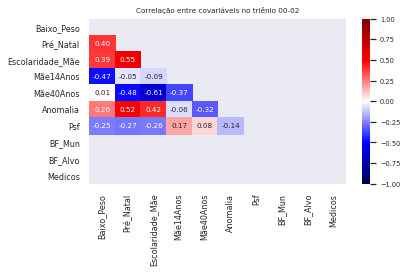

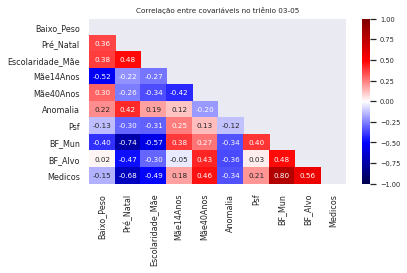

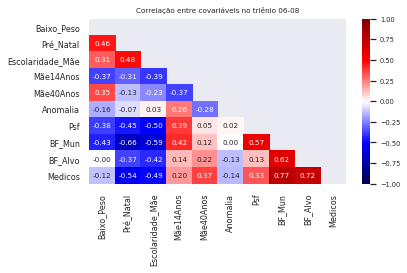

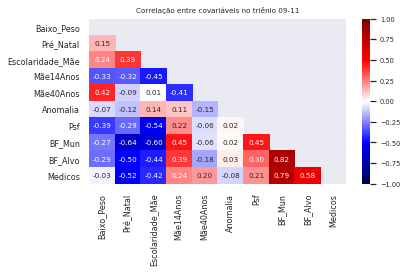

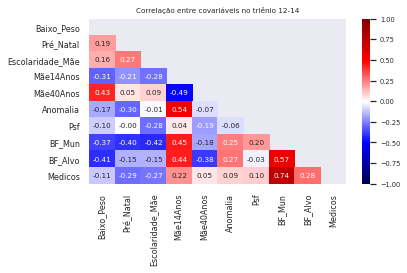

In [109]:
cria_grafico(data00_02, arquivo='00_02', titulo = "Correlação entre covariáveis no triênio 00-02", largura = 6, altura = 4)
cria_grafico(data03_05, arquivo='03_05', titulo = "Correlação entre covariáveis no triênio 03-05", largura = 6, altura = 4)
cria_grafico(data06_08, arquivo='06_08', titulo = "Correlação entre covariáveis no triênio 06-08", largura = 6, altura = 4)
cria_grafico(data09_11, arquivo='09_11', titulo = "Correlação entre covariáveis no triênio 09-11", largura = 6, altura = 4)
cria_grafico(data12_14, arquivo='12_14', titulo = "Correlação entre covariáveis no triênio 12-14", largura = 6, altura = 4)

Criando gráfico da correlação entre as covariáveis e o log do SMR

In [139]:
LOGSMR00_02 = data00_02.join(logSmr['LOGSMR00_02']).corr()['LOGSMR00_02']
LOGSMR03_05 = data03_05.join(logSmr['LOGSMR03_05']).corr()['LOGSMR03_05']
LOGSMR06_08 = data06_08.join(logSmr['LOGSMR06_08']).corr()['LOGSMR06_08']
LOGSMR09_11 = data09_11.join(logSmr['LOGSMR09_11']).corr()['LOGSMR09_11']
LOGSMR12_14 = data12_14.join(logSmr['LOGSMR12_14']).corr()['LOGSMR12_14']

dataCor = pd.DataFrame({'LOGSMR00_02': LOGSMR00_02 ,'LOGSMR03_05': LOGSMR03_05, 'LOGSMR06_08': LOGSMR06_08,
                        'LOGSMR09_11': LOGSMR09_11, 'LOGSMR12_14': LOGSMR12_14})


In [140]:
dataCor = dataCor.T

In [143]:
nome_colunas = ['Baixo_Peso', 'Pré_Natal', 'Escolaridade_Mãe', 'Mãe14Anos', 'Mãe40Anos', 'Anomalia', 'Psf', 'BF_Mun', 'BF_Alvo', 'Medicos']
dataCor = dataCor[nome_colunas]

In [144]:
dataCor

,Baixo_Peso,Pré_Natal,Escolaridade_Mãe,Mãe14Anos,Mãe40Anos,Anomalia,Psf,BF_Mun,BF_Alvo,Medicos
LOGSMR00_02,0.391237,0.300969,-0.003237,-0.271504,-0.043955,0.215313,0.008203,NaN,NaN,NaN
LOGSMR03_05,0.007777,-0.294174,-0.465309,-0.077714,0.436381,-0.084701,0.236875,0.319988,0.226419,0.203115
LOGSMR06_08,-0.129068,-0.288397,-0.597770,0.248258,0.231084,0.015378,0.457866,0.403401,0.204317,0.189669
LOGSMR09_11,-0.000011,-0.444960,-0.490980,0.166905,0.123788,0.019262,0.430426,0.547769,0.488076,0.442612
LOGSMR12_14,-0.058981,-0.199179,-0.368814,0.452346,-0.025268,0.441912,0.186339,0.537481,0.268478,0.323642


In [152]:
def cria_grafico_smr(data, arquivo, titulo, largura = 12, altura = 7):
  
  #criando o grafico
  plt.figure(figsize=(largura, altura))
  sns.set(font_scale=1)

  sns.heatmap(data, vmin=-1, vmax=1, cmap = 'seismic', annot=True, fmt='.2f')
  plt.title(titulo)
  plt.xticks(fontsize = 8)
  plt.yticks(fontsize = 8)

  plt.tight_layout(pad=2)

  plt.savefig(arquivo+'.png')
  plt.show()

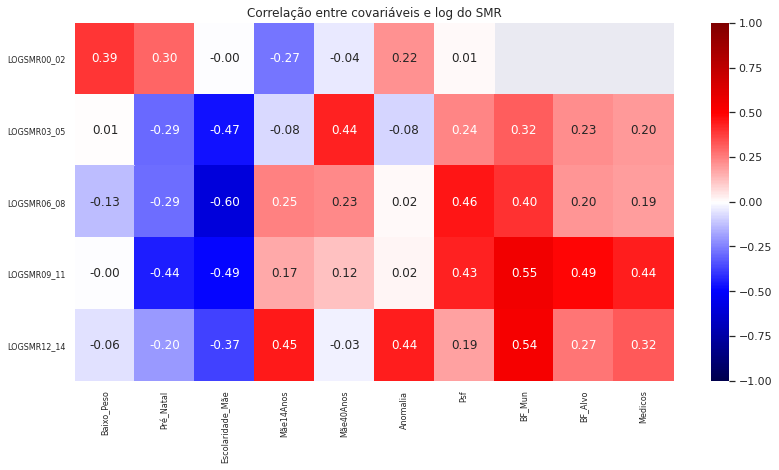

In [153]:
cria_grafico_smr(dataCor, arquivo = 'CorrSMR', titulo = 'Correlação entre covariáveis e log do SMR')

Histograma das covariáveis selecionadas


In [159]:
baixoP = covariaveis[['BaixoP00_02', 'BaixoP03_05', 'BaixoP06_08', 'BaixoP09_11', 'BaixoP12_14']]
preNatal = covariaveis[['PNatal700_02', 'PNatal703_05', 'PNatal706_08', 'PNatal709_11', 'PNatal712_14']]
escMae = covariaveis[['EscMae00_02', 'EscMae03_05', 'EscMae06_08', 'EscMae09_11', 'EscMae12_14']]
psf = covariaveis[['Psf00_02', 'Psf03_05', 'Psf06_08', 'Psf09_11', 'Psf12_14']]

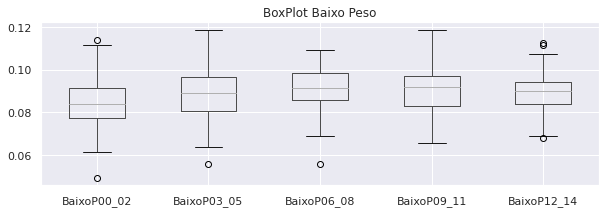

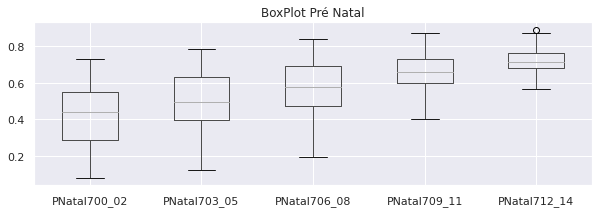

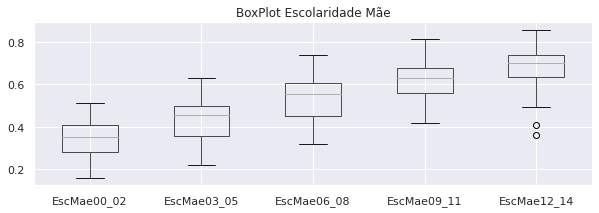

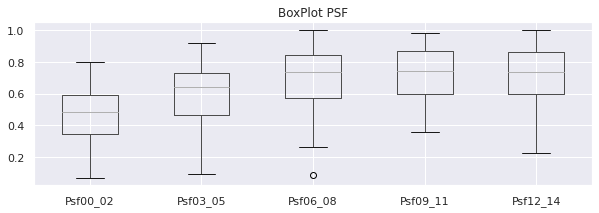

In [173]:
def boxplot(data, arquivo, titulo):
  plt.figure(figsize=(10,3))
  data.boxplot()
  plt.title(titulo)
  plt.savefig(arquivo+'.png')
  plt.show()

boxplot(baixoP, titulo = 'BoxPlot Baixo Peso', arquivo = 'baixop')
boxplot(preNatal, titulo = 'BoxPlot Pré Natal', arquivo = 'pNatal')
boxplot(escMae, titulo = 'BoxPlot Escolaridade Mãe', arquivo = 'escMae')
boxplot(psf, titulo = 'BoxPlot PSF', arquivo = 'psf')